## Medical Appointment No Shows

### 1. Load Libraries

In [1]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from datetime import datetime
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import learning_curve, ShuffleSplit, validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### 2. Load Data

In [3]:
import pandas as pd
df = pd.read_csv('KaggleV2-May-2016.csv')
#list(df. columns)

### 3. Basic Info of the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
print(df.shape)
print(df.head())

(110527, 14)
      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0  

### 4. Data Wrangling, Feature Engineering and EDA

In [6]:
#Rename Columns
df.rename(columns = {'No-show':'No_show',
                         'Hipertension': 'Hypertension',
                     'Handcap': 'Handicap'}, inplace = True)

Print Unique Values and check for any erroneous values and NaNs in data.

In [7]:
print('Age:',sorted(df.Age.unique()))
print('Gender:',df.Gender.unique())
print('No-show:',df.No_show.unique())
print('Diabetes:',df.Diabetes.unique())
print('Alchoholism:',df.Alcoholism.unique())
print('Hypertension:',df.Hypertension.unique())
print('Handicap:',df.Handicap.unique())
print('Scholarship:',df.Scholarship.unique())
print('SMS_received :',df.SMS_received .unique())

Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Gender: ['F' 'M']
No-show: ['No' 'Yes']
Diabetes: [0 1]
Alchoholism: [0 1]
Hypertension: [1 0]
Handicap: [0 1 2 3 4]
Scholarship: [0 1]
SMS_received : [0 1]


As you can see we have negative values for age, so filtering the data

In [8]:
df = df[(df.Age >= 0) & (df.Age <= 95)]
print('Age:',sorted(df.Age.unique()))


Age: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]


Binary coding (1,0) for handicap.

In [9]:
df['Handicap']=df['Handicap'].apply(lambda x: 1 if x in([1,2,3]) else 0)

### 5. Data Visualization

#### 5.1 Show/NoShow by Gender

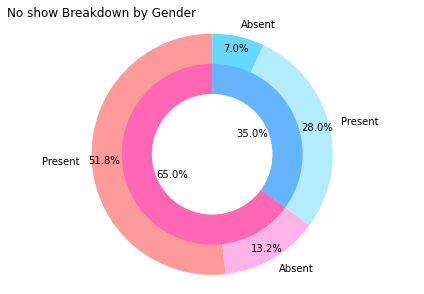

In [10]:
labels2 = ['Present','Absent','Present','Absent']
sizes2 = df.groupby(['Gender','No_show'])['Gender'].count().to_frame()['Gender'].tolist()
labels_gender = ['Female','Male']
sizes_gender = df.groupby('Gender')['Gender'].count().to_frame()['Gender'].tolist()
colors = ['#ff9a9a','#ffb3e6', '#b3ecff','#66d9ff']
colors_gender = ['#ff66b3','#66b3ff']
 
# Plot #ff66b3 
plt.pie(sizes2, labels=labels2, colors=colors, startangle=90,frame=True,autopct='%1.1f%%',pctdistance=0.9)
plt.pie(sizes_gender,colors=colors_gender,radius=0.75,startangle=90,autopct='%1.1f%%',pctdistance=0.5)
#plt.legend(['Female','Male'])
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.title('No show Breakdown by Gender', loc = 'left')
plt.savefig("Pictures\dv1.png",dpi=500,bbox_inches = 'tight')

We can see that 65% of the patients are female (the inner circle), 78% of them (51.8% of the data) show up to the appointments, while 22% of them are absent(13.2% of the overall patients).35% of the patients who make appointments are male, 80% of them show up (28.0% of the patients), while 20% of them are absent (7.0%).

#### 5.2 No show distribution by Gender & Age

C:\Users\Narsimha\anaconda3\envs\rex\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Narsimha\anaconda3\envs\rex\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


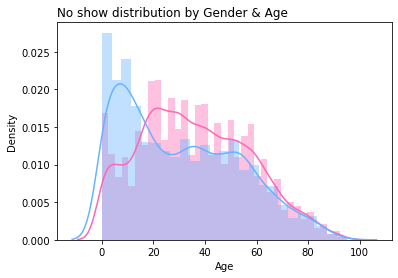

In [11]:
sb.distplot(df[(df['Gender']=='F') & (df['No_show']=='Yes')]['Age'],color='#ff66b3')
sb.distplot(df[(df['Gender']=='M') & (df['No_show']=='Yes')]['Age'],color='#66b3ff')
#plt.legend(['Female','Male'])
#plt.show()
plt.title('No show distribution by Gender & Age', loc = 'left')
plt.savefig("Pictures\dv2.png",dpi=500,bbox_inches = 'tight')

The distribution of no-shows by age and gender - we can see that in the range 0-10, there is no difference between the rate of no-shows between males and females. However, from the age range of 10-18, the male has more no show, while from the age 18-60, the female has more no show than male.

#### 5.3 Show vs No show Percentage by Gender & Age

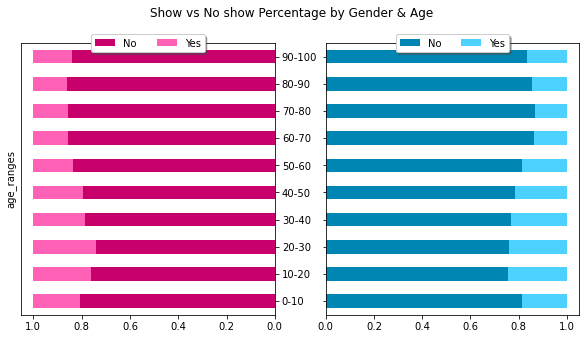

In [12]:
# make aranges for the ages in the dataset
df['age_ranges']=pd.cut(np.array(df['Age']),10,                        
labels=["0-10", "10-20", "20-30","30-40","40-50","50-60","60-70","70-80","80-90","90-100"])

df[df['No_show']=='Yes'].groupby('age_ranges').count()['AppointmentID']

uniq_id=df.drop_duplicates(subset='PatientId', keep="last")
uniq_id_f=uniq_id[uniq_id['Gender']=='F'].groupby(['age_ranges','No_show']).count()['AppointmentID'].to_frame().reset_index(level=1).pivot_table(index='age_ranges',columns='No_show',values='AppointmentID')
uniq_id_m=uniq_id[uniq_id['Gender']=='M'].groupby(['age_ranges','No_show']).count()['AppointmentID'].to_frame().reset_index(level=1).pivot_table(index='age_ranges',columns='No_show',values='AppointmentID')

row_sum_f=uniq_id_f.sum(axis=1) # for female
row_sum_m=uniq_id_m.sum(axis=1) # for male

uniq_id_f['Yes']=uniq_id_f['Yes']/row_sum_f # for female
uniq_id_f['No']=uniq_id_f['No']/row_sum_f  

uniq_id_m['Yes']=uniq_id_m['Yes']/row_sum_m # for male
uniq_id_m['No']=uniq_id_m['No']/row_sum_m


fig,(ax1,ax2)=plt.subplots(1, 2, sharey=True,figsize=(10,5))
uniq_id_f.plot(kind='barh',stacked=True,align='center',ax=ax1,color=['#c7006b','#ff61b6'])
#ax1.title.set_text("Female")
uniq_id_m.plot(kind='barh',stacked=True,align='center',ax=ax2,color=['#0086b3','#4dd2ff'])
#ax2.title.set_text("Male")
ax1.yaxis.tick_right()
ax1.invert_xaxis()
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.savefig("High resoltion3.png",dpi=300)
plt.suptitle('Show vs No show Percentage by Gender & Age')
plt.savefig("Pictures\dv3.png",dpi=500,bbox_inches = 'tight')

Individuals in different age groups exhibit different No-Show behaviors. For example, infants/boys/girls, teenagers, working-age people, and retired populations will all have different No-Show patterns. We can see from this figure that a high rate of females in the age range 20-30 are absent, while there is a high rate of males in the age range of 10-20 who are absent.

#### 5.4 Appointment count by neighborhood

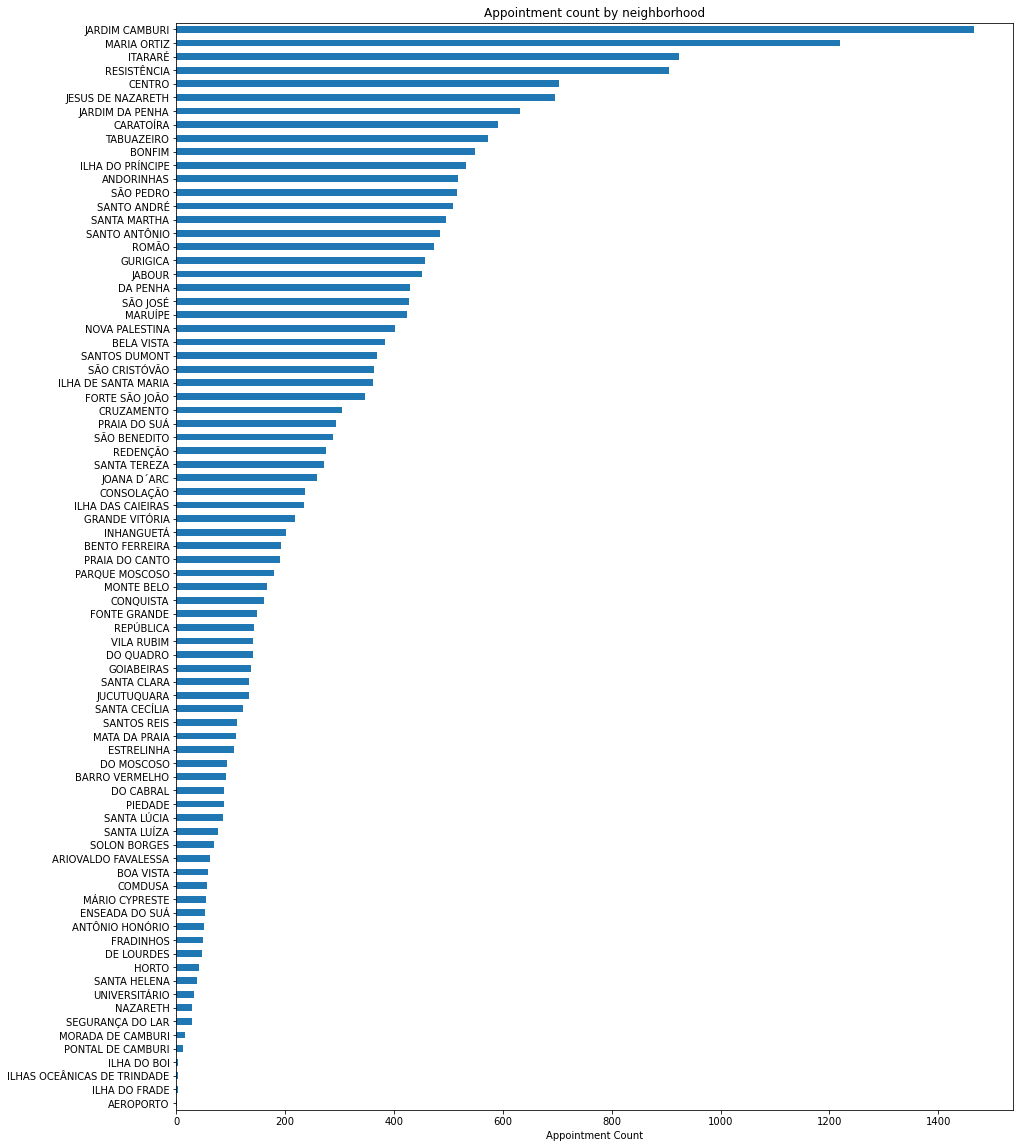

In [13]:
fig,ax=plt.subplots(figsize=(15,20))
df[df['No_show']=='Yes'].groupby('Neighbourhood')['AppointmentID'].agg(['count']).sort_values(by=('count')).plot(kind='barh',ax=ax)
#plt.yticks(rotation=45)
ax.get_legend().remove()
plt.ylabel('')
plt.xlabel('Appointment Count')
plt.title("Appointment count by neighborhood", loc = 'center')
plt.savefig("Pictures\dv4.png",dpi=500,bbox_inches = 'tight')
#plt.show()

We have 80 unique nieghbors and JARDIM CAMBURI is the neighborhood which has the max no shows


#### 5.5 Show vs No Show percentage by Neighborhood

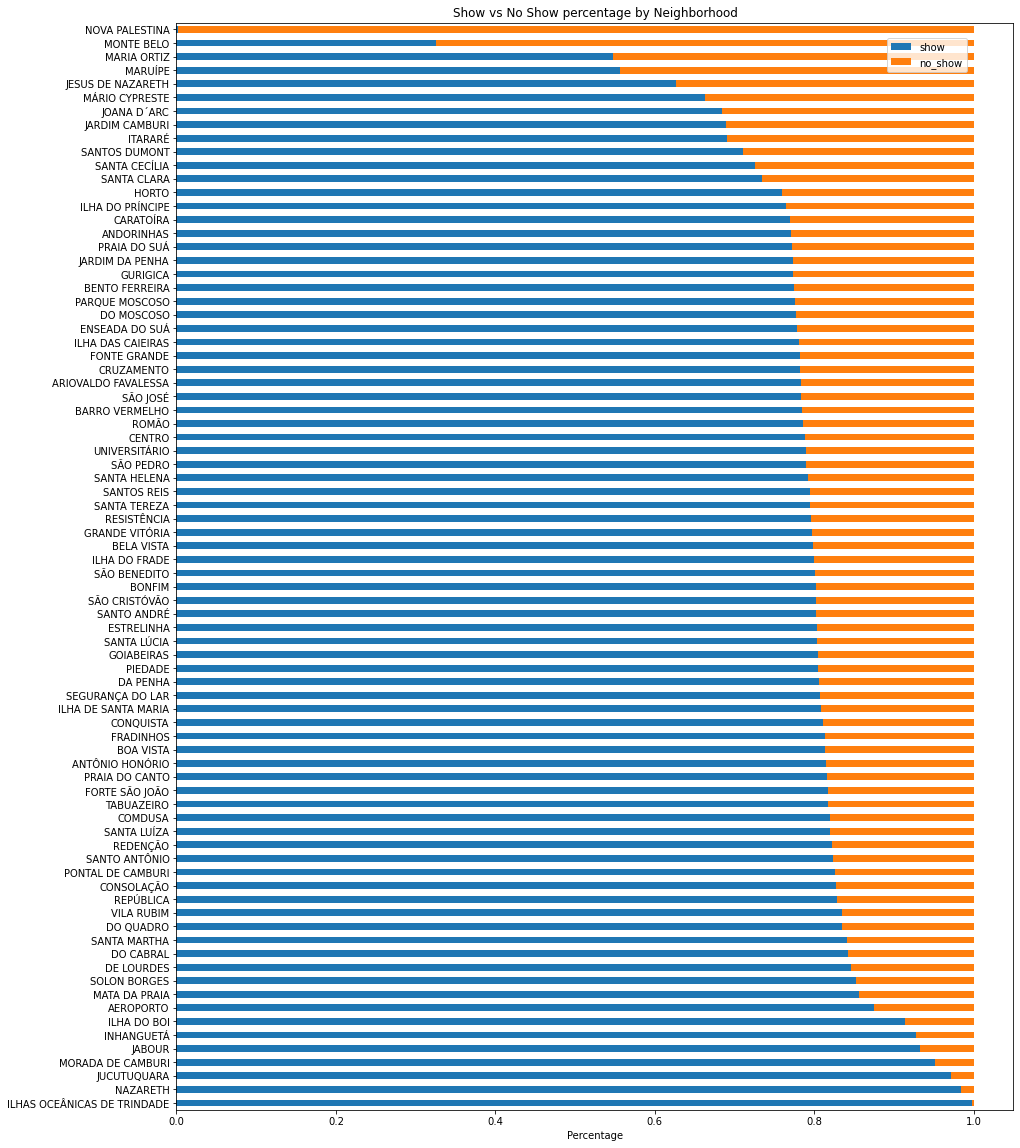

In [14]:
show_nbr=df[df['No_show']=='No'].groupby('Neighbourhood')['AppointmentID'].agg(['count'])
no_show_nbr=df[df['No_show']=='Yes'].groupby('Neighbourhood')['AppointmentID'].agg(['count'])

# make a new dataframe which have the number of Absent and shows in each neighbor - and the sum of allt he appointement of each region
# and the percent of the show vs no- show .
show_sum_nbr=show_nbr.merge(no_show_nbr,how='inner', on=no_show_nbr.index,suffixes=('_show', '_no_show'))

# change the columns value to percent 
# the percent of no show by each neighbrhood
row_sum=show_sum_nbr.sum(axis=1)

# the percent of show by each neighbrhood
show_sum_nbr['count_show']=(show_sum_nbr['count_show'])/(row_sum)
show_sum_nbr['count_no_show']=(show_sum_nbr['count_no_show'])/(row_sum)
show_sum_nbr.set_index('key_0',inplace=True)
show_sum_nbr=show_sum_nbr.sort_values(by='count_no_show')
fig,ax=plt.subplots(figsize=(15,20))
show_sum_nbr.plot(kind='barh',stacked=True,align='center',ax=ax)
#plt.yticks(rotation=45)
plt.title("Show vs No Show percentage by Neighborhood", loc = 'center')
plt.xlabel("Percentage")
plt.ylabel('')
plt.legend(labels=('show','no_show'),loc='upper right', bbox_to_anchor=(0.95, 0.99))
plt.savefig("Pictures\dv5.png", dpi=500,bbox_inches = 'tight')

We can see here that there is a high rate of absent patients from some of the neighborhoods like nova Palestina.

#### 5.6 Show vs No Show for each of the categorical variables

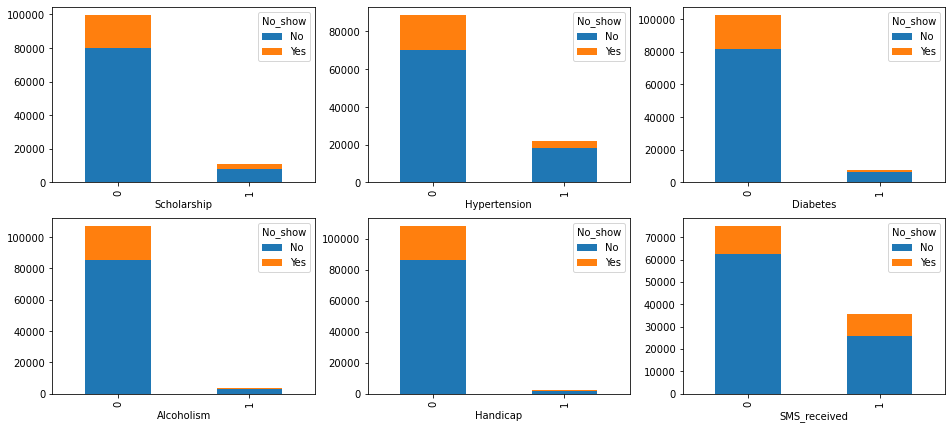

In [15]:
# First, let's look at categorical variables
categorical_vars = [ 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received']

fig = plt.figure(figsize=(16, 11))
#plt.suptitle("Rate of show vs no show for each feature")
for i, var in enumerate(categorical_vars):
    ax = fig.add_subplot(3, 3, i+1)    
    df.groupby([var, 'No_show'])[var].count().unstack('No_show').plot(ax=ax, kind='bar', stacked=True)  
    
plt.savefig("Pictures\dv6.png", dpi=500,bbox_inches = 'tight')

In [16]:
#Binary coding (1,0) for No_Show & Gender.
df['No_show']=df['No_show'].apply(lambda x: 1 if x =='Yes' else 0)
df['Gender']=df['Gender'].apply(lambda x: 1 if x =='M' else 0)

#### 5.7 Correlation matrix

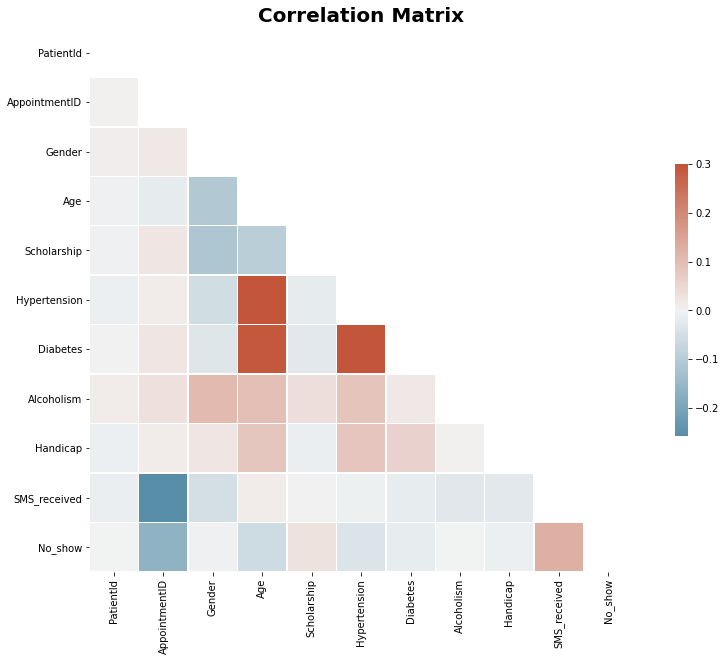

In [17]:
# Create the correlation matrix
#corr = df1.drop(col_todrop1,axis=1).corr()
corr=df.corr()
fig,ax= plt.subplots(figsize=(15,10))
# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr))
 
# Add the mask to the heatmap
#dataplot = sb.heatmap(corr, cmap="ISLR",linewidths=1,  mask=mask,fmt=".2f")

# Generate a custom diverging colormap
cmap = sb.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix', fontsize=20, fontweight='bold')
plt.savefig("Pictures\dv7.png", dpi=500,bbox_inches = 'tight')

Before machine learning, we must check if there is a correlation between the features and we can see from above that there is no high correlation between the features

#### 5.8 Pair Plot of all features vs Show/NoShow

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

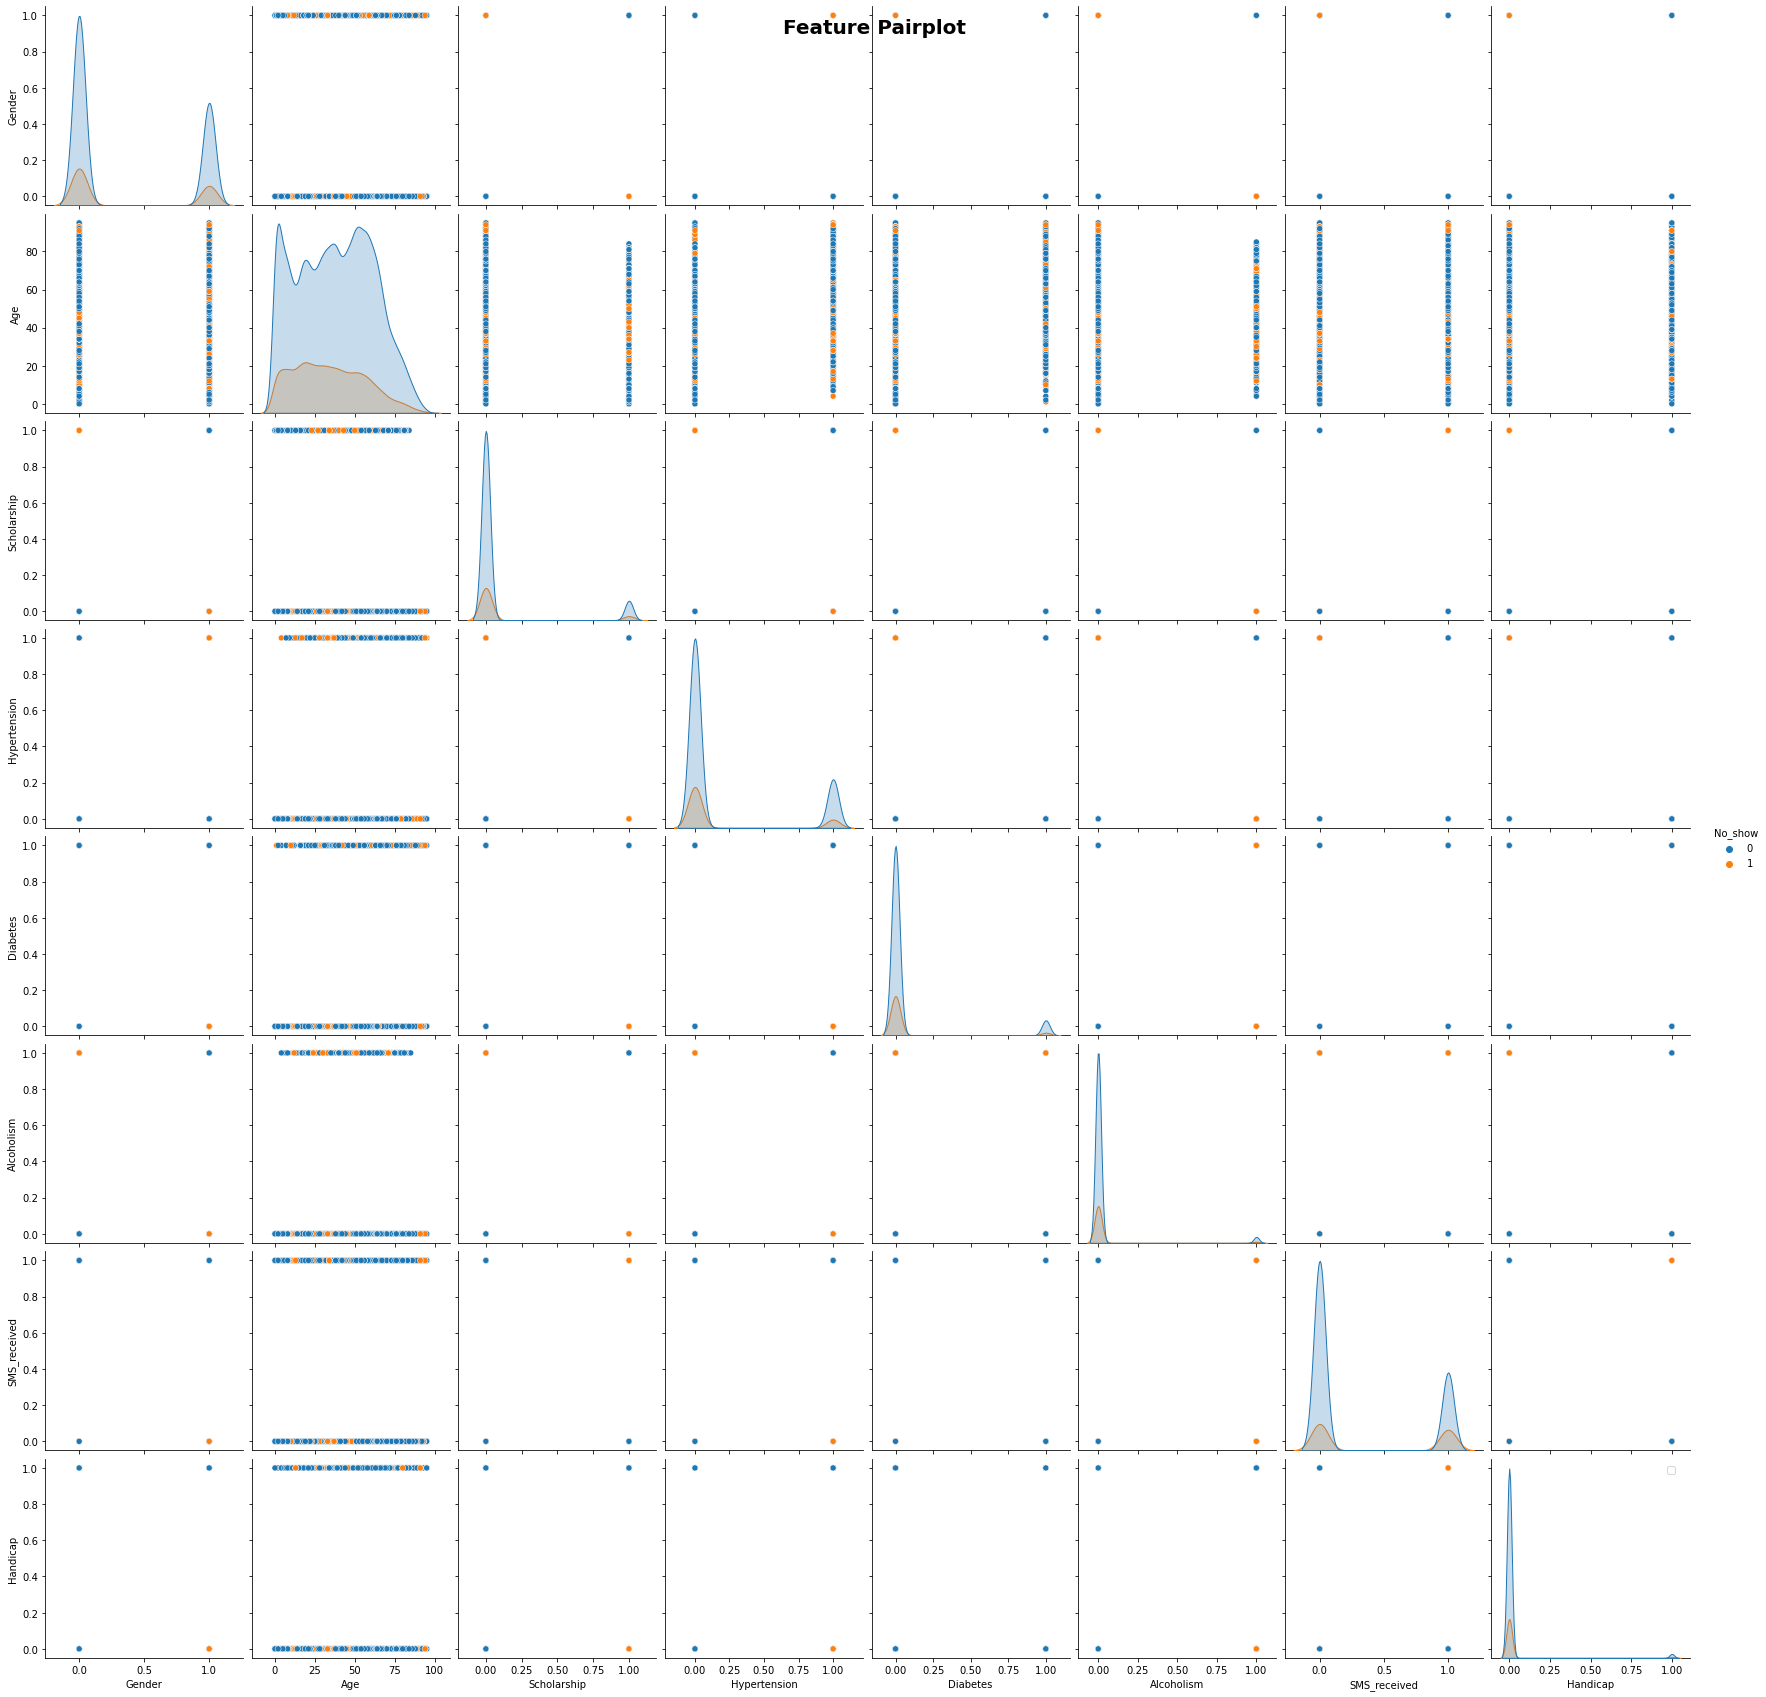

In [18]:
plt.figure()
Z = df[['Gender','Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'SMS_received', 'Handicap','No_show']]
sb.pairplot(Z, hue = "No_show", height=3)
plt.suptitle('Feature Pairplot', fontsize=20, fontweight='bold')
plt.legend(loc='upper right', bbox_to_anchor=(0.95, 0.99))
plt.savefig("Pictures\dv8.png", dpi=500,bbox_inches = 'tight')

### 6. Model Building

In [19]:
from sklearn.model_selection import train_test_split

X = df[['Gender','Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'SMS_received', 'Handicap']]
y = df['No_show']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 87)

#### 6.1 KNN Classifier

Use RandomizedSearchCV to find the best k & 5 fold Cross validation

In [20]:
#KNN via RandomizedSearchCV & 5 CV
k_range = list(range(1, 25))
knn = KNeighborsClassifier()
param_grid = dict(n_neighbors=k_range)
grid = RandomizedSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print(grid.best_params_['n_neighbors'])

16


Use the k Value from above optimization to find the Accuracy.

In [21]:
best_model = KNeighborsClassifier(n_neighbors= grid.best_params_['n_neighbors'])
best_model.fit(X_train,y_train)
KNN_predicts = best_model.predict(X_test)
accuracy_score(y_test,KNN_predicts)

0.8020456191165822

#### 6.1 Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

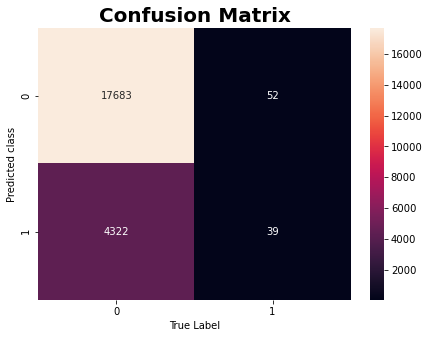

In [22]:
fig,ax=plt.subplots(figsize=(7,5))
knn_conf_mat = confusion_matrix(y_test, KNN_predicts)
sb.heatmap(knn_conf_mat,  annot=True, fmt='d')
plt.ylabel('Predicted class')
plt.xlabel('True Label')
plt.savefig("Pictures\dv10.png", dpi=500,bbox_inches = 'tight')
plt.title('Confusion Matrix',  fontsize=20, fontweight='bold')

#### 6.2 Finding Best K manually to plot the K Elbow Graph

In [23]:
#Finding Best K manually
k_range=np.arange(1,25)

scores={}
list_of_scores=[]	

for k in  k_range:	
	knn=KNeighborsClassifier(n_neighbors=k)
	knn.fit(X_train,y_train)
	pred=knn.predict(X_test)
	scores[k]=metrics.accuracy_score(y_test,pred)
	list_of_scores.append(scores[k])

#print(list_of_scores)

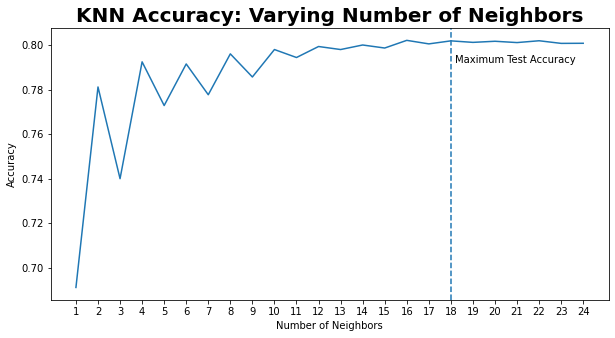

In [24]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(10,5))


df2 = pd.DataFrame(list_of_scores, k_range)
df2.rename(columns={ df2.columns[0]: "Score" }, inplace = True)

# Add markers and corresponding text by looping through the 
plt.plot(df2)

# Loop for annotation of all points
for  index, row in df2.iterrows():
    #print(row['Score'])
    if index == 18:
        #print(index,row['Score'])        
        #plt.annotate("Some",index,row['Score'] )
        plt.text(index+0.2,row['Score']-0.01,"Maximum Test Accuracy" )
        plt.axvline(x=index, label='line at x = {}'.format(index),ls='--')

plt.title("KNN Accuracy: Varying Number of Neighbors",  fontsize=20, fontweight='bold')
plt.xlabel("Number of Neighbors")
plt.xticks(k_range)
plt.ylabel("Accuracy")
plt.savefig("Pictures\dv9.png", dpi=500,bbox_inches = 'tight')


#### 6.3 Evaluate KNN Performance on train and test sets with different numbers of neighbors

>1, train: 0.717, test: 0.708
>2, train: 0.788, test: 0.785
>3, train: 0.756, test: 0.750
>4, train: 0.786, test: 0.784
>5, train: 0.774, test: 0.769
>6, train: 0.794, test: 0.793
>7, train: 0.780, test: 0.776
>8, train: 0.794, test: 0.793
>9, train: 0.790, test: 0.789
>10, train: 0.794, test: 0.795
>11, train: 0.792, test: 0.792
>12, train: 0.796, test: 0.796
>13, train: 0.794, test: 0.794
>14, train: 0.797, test: 0.798
>15, train: 0.795, test: 0.795
>16, train: 0.796, test: 0.797
>17, train: 0.796, test: 0.796
>18, train: 0.797, test: 0.798
>19, train: 0.797, test: 0.797
>20, train: 0.797, test: 0.799
>21, train: 0.797, test: 0.799
>22, train: 0.797, test: 0.799
>23, train: 0.797, test: 0.799
>24, train: 0.797, test: 0.799


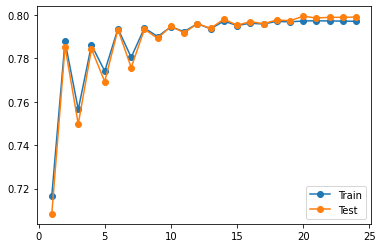

<Figure size 432x288 with 0 Axes>

In [25]:
# evaluate knn performance on train and test sets with different numbers of neighbors
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot
# create dataset
#X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 25)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = KNeighborsClassifier(n_neighbors=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()
pyplot.savefig("Pictures\dv11.png", dpi=500,bbox_inches = 'tight')